In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips_df.describe(include='all')

# describe 는 수치형 데이터만 가져오지만 (include='all')을 하면 문자열도 가져옴

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


- x축, y축에 필요한 정보를 넣어서 시각화
- 범주형 데이터, 연속형 자료형, 관측치(Y)축

<Axes: xlabel='day', ylabel='count'>

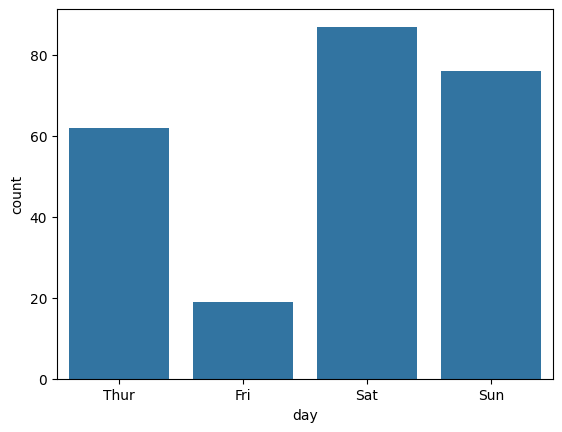

In [4]:
# countplot : x축 범주형, y측 관측치

sns.countplot(data=tips_df, x = 'day')

<Axes: xlabel='sex', ylabel='tip'>

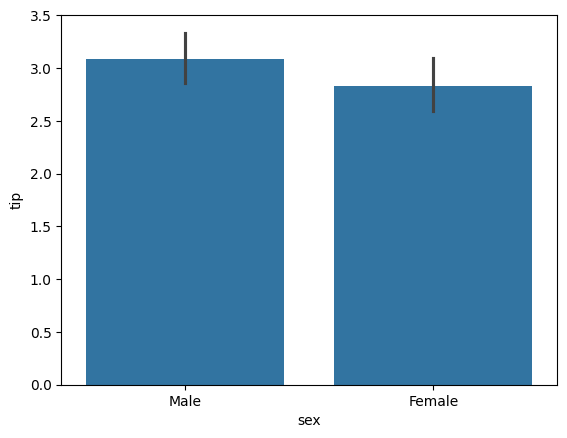

In [5]:
# barplot : x축 범주형, y축이 연속형 값

sns.barplot(data=tips_df, x = 'sex', y='tip', estimator='mean')

<Axes: xlabel='time', ylabel='total_bill'>

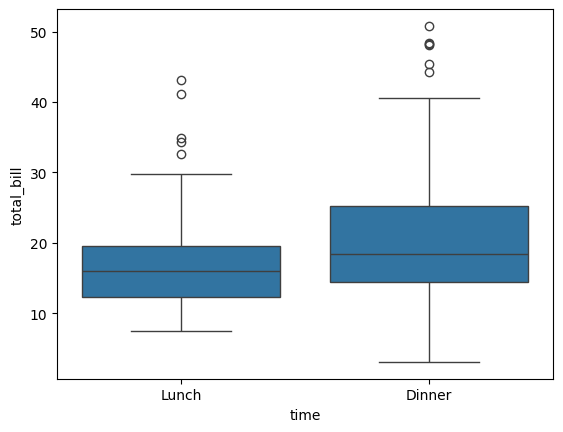

In [6]:
sns.boxplot(data=tips_df, x='time', y='total_bill')

<Axes: xlabel='total_bill', ylabel='Count'>

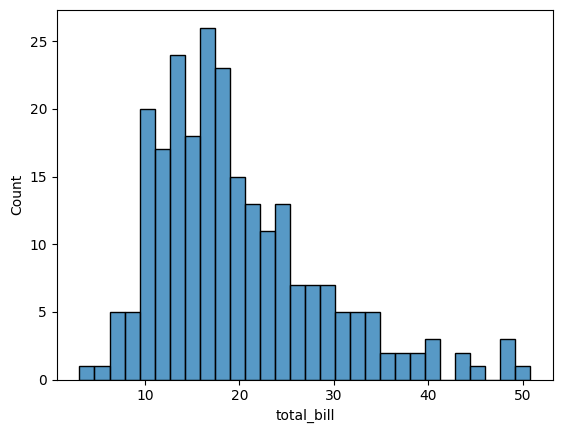

In [7]:
sns.histplot(data=tips_df, x='total_bill', bins=30)

<Axes: ylabel='Frequency'>

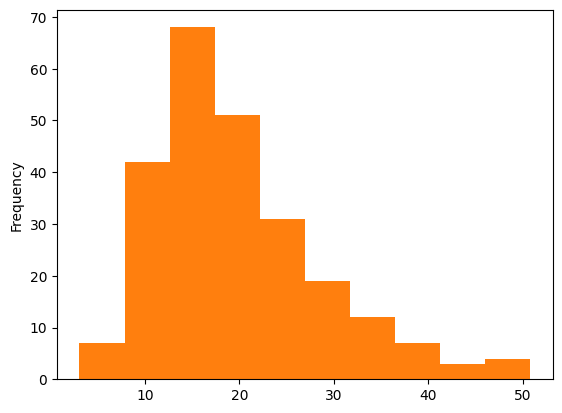

In [8]:
tips_df['total_bill'].hist()  # dataframe 시리즈에서도 히스토그램을 지원함
tips_df['total_bill'].plot.hist()

<Axes: xlabel='total_bill', ylabel='tip'>

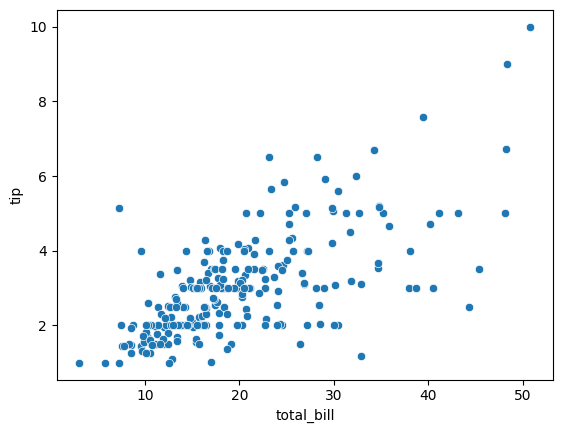

In [9]:
# x축: 수치형변수
# y축: 수치형변수

sns.scatterplot(data=tips_df, x = 'total_bill', y='tip')

# 점을 찍어 분포를 보기엔 좋음
# 문제는 겹쳐져 있는 데이터가 얼만큼 뭉쳐져 있는지 알 수 없음. (-> 데이터 분포를 따로 봐야함))

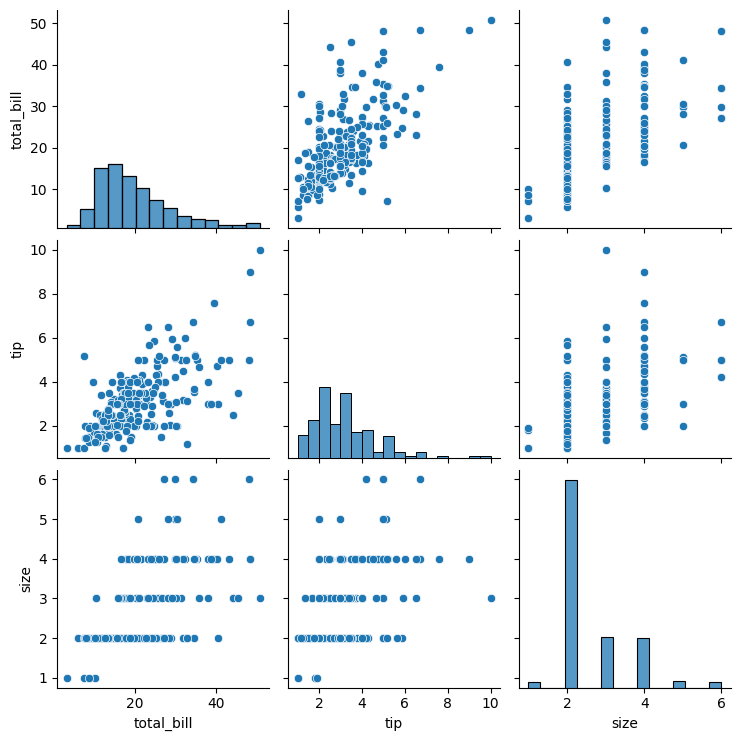

In [10]:
sns.pairplot(data=tips_df)

# 같은 구간이 만나면 히스토그램으로 표현함
# 범주형 데이터는 따로 봐야함

- ESD 이상치 처리

In [11]:
import numpy as np

mean = np.mean(tips_df['total_bill'])
std = np.std(tips_df['total_bill'])
upper_limit = mean + 3*std
lower_limit = mean - 3*std
print(upper_limit)
print(lower_limit)

46.43839435626422
-6.866509110362578


In [12]:
tips_df[['total_bill']].head(3)

,total_bill
0,16.99
1,10.34
2,21.01


In [13]:
# 불리언 인덱싱

cond = tips_df['total_bill'] > 46.4
cond

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Name: total_bill, Length: 244, dtype: bool

In [14]:
# false 는 제외 되고 true 값안 나오게 됨
tips_df[cond]

# 데이터 양이 작아서 데이터 자체를 삭제하기 곤란한 경우에는, 값을 상한이상치에 근접한 숫자로 대체할 수 있음 48->46

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


- IQR을 이용한 이상치 확인 (boxplot)

<Axes: ylabel='total_bill'>

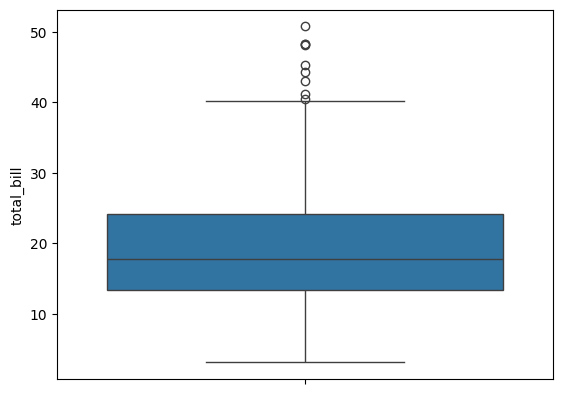

In [15]:
import seaborn as sns
sns.boxplot(tips_df['total_bill'])

In [16]:
q1 = tips_df['total_bill'].quantile(0.25)
q3 = tips_df['total_bill'].quantile(0.75)
iqr = q3 - q1
upper_limit2 = q3 + 1.5*iqr
lower_limit2 = q1 - 1.5*iqr
print(q1,q3, iqr, upper_limit2, lower_limit2)

13.3475 24.127499999999998 10.779999999999998 40.29749999999999 -2.8224999999999945


In [17]:
cond2 = (tips_df['total_bill'] > upper_limit2)
tips_df[cond2]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


- 결측치 처리하기
    -  타이타닉 데이터 사용

In [18]:
import pandas as pd

titanic_df = pd.read_csv("/Users/hj/Downloads/titanic/train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic_df.info()

# age, cabin 결측치 존재 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
# 결측치 삭제 

titanic_df.dropna(axis = 0).info()

# 데이터에 비어있는 값이 있으면 다 날려버린것
# 데이터 양 891 -> 183

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [21]:
cond3 = (titanic_df['Age'].notna()) # 'Age'에 값이 존재하는지 불리언인덱싱으로 확인
titanic_df[cond3].info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [22]:
# fillna 이용한 결측치 대치

age_mean = titanic_df['Age'].mean().round(2)
titanic_df['age_mean'] = titanic_df['Age'].fillna(age_mean)

In [23]:
titanic_df.info()

# age_mean 컬럼 개수 891
# 널값 age 평균값으로 대치함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  age_mean     891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [24]:
# SimpleInputer 이용한 대치

from sklearn.impute import SimpleImputer
si = SimpleImputer()
si.fit(titanic_df[['Age']])

SimpleImputer()

In [25]:
si.statistics_  # 통계량

array([29.69911765])

In [26]:
titanic_df['Age_si_mean'] = si.transform(titanic_df[['Age']])

In [27]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  age_mean     891 non-null    float64
 13  Age_si_mean  891 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory usage: 97.6+ KB


### 범주형 데이터 전처리 - 인코딩 (Encoding)

- 인코딩의 사전적 뜻은 어떤 정보를 정해진 규칙에 따라 변환하는 것.

1. 레이블 인코딩 (Label Encoding) : 문자열 범주형 값을 고유한 숫자로 할당
    - 1등급 -> 0
    - 2등급 -> 1
    - 3등급 -> 2
    
    - 사용함수 : `sklearn.preprocessing.LabelEncoder`
2. 원-핫 인코딩 (One-Hot Encoding) : 각 범주를 이진 형식으로 변환하는 기법
    - 빨강 -> [1,0,0]
    - 파랑 -> [0,1,0]
    - 초록 -> [0,0,1]
    - 사용함수 : `pd.get_dummies`, `sklearn.preprocessing.OneHotEncoder`

In [28]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_mean,Age_si_mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


- 성별(sex)은 LavelEncoder
- 항구(Embarked) OneHotEncoder

In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
oe = OneHotEncoder()

In [30]:
le.fit(titanic_df[['Sex']])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [31]:
le.classes_

array(['female', 'male'], dtype=object)

In [32]:
titanic_df['Sex_le'] = le.transform(titanic_df[['Sex']])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [33]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_mean,Age_si_mean,Sex_le
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,1


In [34]:
oe.fit(titanic_df[['Embarked']])

OneHotEncoder()

In [35]:
oe.categories_

[array(['C', 'Q', 'S', nan], dtype=object)]

In [36]:
embarked_csr = oe.transform(titanic_df[['Embarked']])
embarked_csr_df = pd.DataFrame(embarked_csr.toarray(), columns=oe.get_feature_names_out())
embarked_csr_df.head(3)

,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0


In [37]:
pd.concat([titanic_df, embarked_csr_df], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_mean,Age_si_mean,Sex_le,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.000000,1,0.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.000000,0,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.000000,0,0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.000000,0,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.000000,1,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0,27.000000,1,0.0,0.0,1.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0,19.000000,0,0.0,0.0,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,29.7,29.699118,0,0.0,0.0,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0,26.000000,1,1.0,0.0,0.0,0.0


### 수치형 데이터 전처리 - 스케일링(Scaling)

1. 표준화 (Standardization) : 각 데이터에 평균을 빼고 표준편차를 나누어 평균을 0, 표준편차를 1로 조정하는 방법
    - 함수 : `sklearn.preprocessing.StandardScaler`
    - 이상치가 있거나 분포가 치우쳐져 있을 때 유용 (장점)
    - 데이터의 최소-최대값이 정해져 있지 않음 (단점)
<br>
2. 정규화 (Normalization) : 데이터를 0과 1사이 값으로 조정 (최소값 0, 최대값 1)
    - 함수 : `sklearn.preprocessing.MinMaxScaler`
    - 모든 특성의 스케일을 동일하게 맞추고 최대-최소 범위가 명확함 (장점)
    - 이상치에 영향을 많이 받음 (이상치 없을때 유용)
<br>
3. 로버스트 스케일링 (Robust Scaling) : 중의값과 IQR을 사용하여 스케일링
    - 함수 : `sklearn.preprocessing.RobustScaler`
    - 이상치의 영향에 덜 민감 (장점)
    - 표준화와 정규화에 비해 덜 사용됨 (단점)

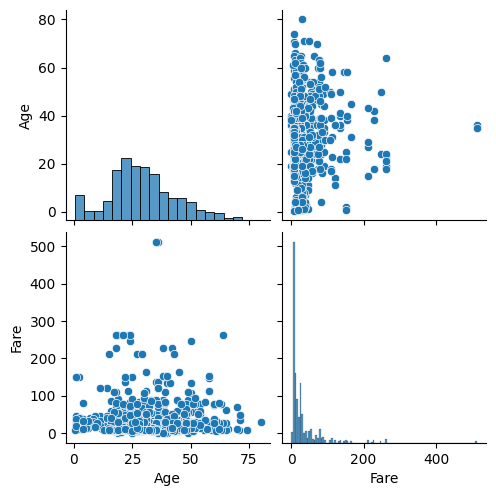

In [38]:
import seaborn as sns
sns.pairplot(titanic_df[['Age', 'Fare']])

In [39]:
# 기술통계

titanic_df[['Age', 'Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


- age 는 minmaxscaler
- fare는 standardscaler

In [40]:
from sklearn.preprocessing import  MinMaxScaler, StandardScaler
mm_sc = MinMaxScaler()
sd_sc = StandardScaler()

In [41]:
# Age 변환하기

titanic_df['Age_mean_mm_sc'] = mm_sc.fit_transform(titanic_df[['age_mean']])
titanic_df['Age_mean_mm_sc'].head()

0    0.271174
1    0.472229
2    0.321438
3    0.434531
4    0.434531
Name: Age_mean_mm_sc, dtype: float64

In [42]:
titanic_df['Fare_sd_sc'] = sd_sc.fit_transform(titanic_df[['Fare']])
titanic_df['Fare_sd_sc'].head()

0   -0.502445
1    0.786845
2   -0.488854
3    0.420730
4   -0.486337
Name: Fare_sd_sc, dtype: float64

<Axes: xlabel='Age_mean_mm_sc', ylabel='Count'>

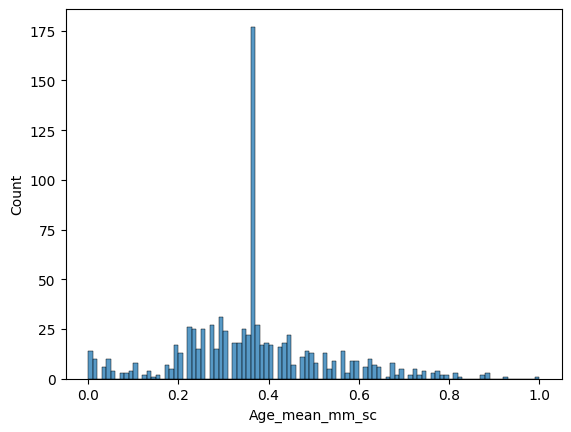

In [43]:
sns.histplot(titanic_df['Age_mean_mm_sc'], bins=100)

<Axes: xlabel='Fare_sd_sc', ylabel='Count'>

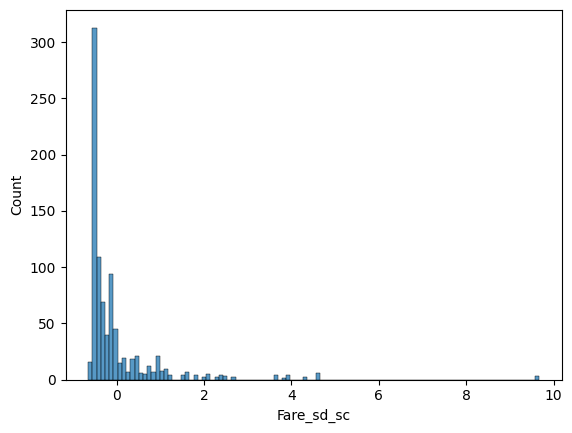

In [44]:
sns.histplot(titanic_df['Fare_sd_sc'])

### 과적합이란?

- 데이터를 너무 과도하게 학습한 나머지, 해당 문제만 잘 맞추고 새로운 데이터를 제대로 예측 혹은 분류하지 못하는 현상
- 과적합의 원인
    - 모델의 목잡도
    - 데이터 양이 충분하지 않음
    - 학습 반복이 많음 (딥러닝의 경우)
    - 데이터 불균형 (정상환자-암환자의 비율이 9:1)

#### 해결방법 : 테스트 데이터의 분리

기존 row data에서 7:3 비율로 학습용 데이터(train)<->평가용 데이터(test)로 분리시킨다.

- 함수 : `sklearn.model_selection.train_test_split`
- 파라미터: 
    - `test_size`: 테스트 데이터 세트 크기 
    - `train_size`: 학습 데이터 세트 크기
    - `shuffle`: 데이터 분리 시  섞기 (코드 실행마다 랜덤이 돌아가지 않도록 아래 랜덤 스테이트 정함)
    - `random_state`: 호출할 때마다 동일한 학습/테스트 데이터를 생성하기 위한 난수 값. 수행할 때 마다 동일한 데이터 세트로 분리하기 위해 숫자를 고정 시켜야 함
- 반환 값(순서 중요)
    `X_train`, `X_test`, `y_train`, `y_test`

- train_text_split
- x변수 : Fare, Sex
- y변수 : Survived


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic_df[['Fare', 'Sex']], titanic_df[['Survived']],
                                                    test_size = 0.3,
                                                    shuffle= True, random_state=42, stratify =titanic_df[['Survived']])

In [46]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(623, 2) (268, 2) (623, 1) (268, 1)


<Axes: xlabel='Survived', ylabel='count'>

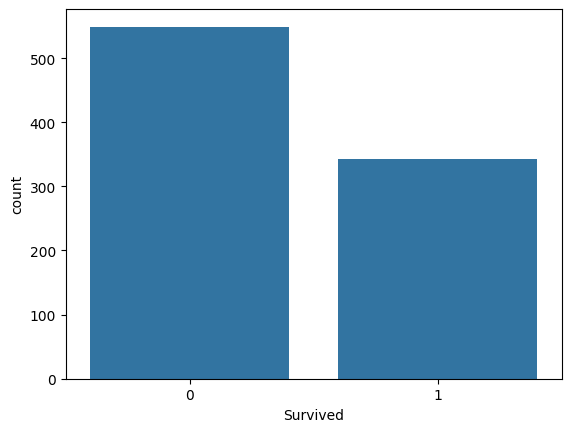

In [47]:
# 원자료 891개 y값의 분포
sns.countplot(data=titanic_df, x='Survived')

<Axes: xlabel='Survived', ylabel='count'>

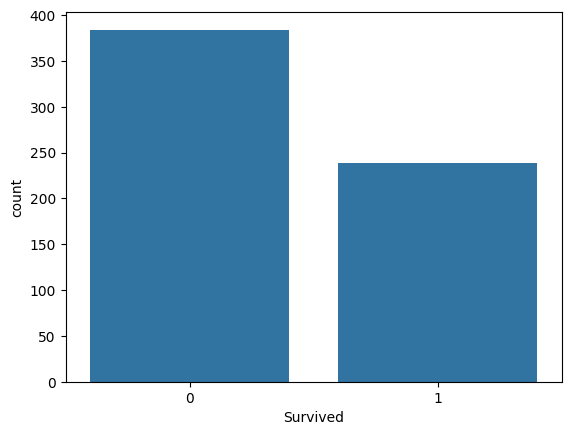

In [48]:
sns.countplot(y_train, x='Survived')

<Axes: xlabel='Survived', ylabel='count'>

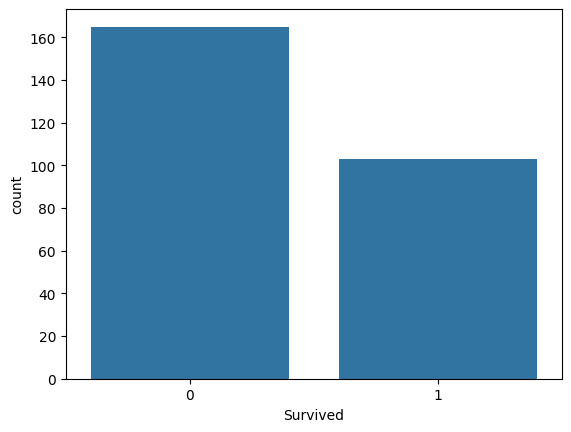

In [49]:
sns.countplot(y_test, x='Survived')

원자료의 'Survived' 값의 비율이 6:4면
train 데이터도 6:4의 비율로 뽑고,
test 데이터도 6:4의 비율로 뽑아야 함

-> stratify 